In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [435]:
class Perceptron:
    def __init__(self, features, epochs=1000, learning_rate=0.01):
        self.epochs = epochs
        self.features = features
        self.learning_rate = learning_rate
#         self.weights = np.zeros(features + 1)
        self.weights = [0 for i in range(features+1)]
           
    def predict(self, inputs):
        summation = self.weights[0]
        summation += sum([inputs[j]*self.weights[j+1] for j in range(self.features)])
#         if summation > 0:
#           stepFunction = 1
#         else:
#           stepFunction = 0 
        return 1 if summation>0 else 0

    def train(self, tinputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(tinputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [436]:
def ConfusionMatrix(label, predicted):
    data = {'Actual Label': label, 'Predicted Label': predicted}
    df = pd.DataFrame(data, columns=data.keys())
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    sns.heatmap(confusion_matrix, annot=True)

In [455]:
# Creating RandomDataSet.csv
data = np.zeros((100,5), dtype=float)

np.random.seed(42)
data[:50,4] = 0
data[50:,4] = 1

for i in range(data.shape[1]-1):
    data[:50, i] = np.random.random((1,50))*10
    data[50:, i] = np.random.random((1,50))*50

df = pd.DataFrame(data, columns= ['Feature'+str(i) for i in range(1,5)]+['label'])
df.to_csv("RandomDataSet.csv", index=False)

In [466]:
# reading the created RandomDataSet.csv
df = pd.read_csv('RandomDataSet.csv')
df.head()

Feature1  Feature2  Feature3  Feature4  label
0  3.745401  0.314292  6.420316  0.516817    0.0
1  9.507143  6.364104  0.841400  5.313546    0.0
2  7.319939  3.143560  1.616287  5.406351    0.0
3  5.986585  5.085707  8.985542  6.374299    0.0
4  1.560186  9.075665  6.064291  7.260913    0.0

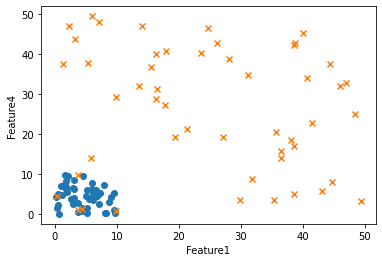

In [467]:
plt.scatter(df[ df['label']==0.0 ]['Feature1'], df[ df['label']==0.0 ]['Feature4'], marker='o', Label=0)
plt.scatter(df[ df['label']==1.0 ]['Feature1'], df[ df['label']==1.0 ]['Feature4'], marker='x', Label=1)

plt.xlabel('Feature1')
plt.ylabel('Feature4')

plt.show()

In [468]:
data = df.to_numpy()
print(data.shape)

test = np.vstack((data[:20], data[50:70]))
train = np.vstack((data[20:50], data[70:]))

features = train[:,:-1]
labels = train[:,-1]

(100, 5)


In [469]:
p = Perceptron(features.shape[1])

In [470]:
p.train(features, labels)

In [471]:
predicted = list()
testLabel = list(map(int, test[:,-1]))

print("Labels\tPredicted")

for i in range(test.shape[0]):
    predicted.append(p.predict(test[i,:-1]))
    print(f'{int(test[i,-1])}\t{predicted[-1]}')

Labels	Predicted
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	1
1	0
1	1


{'TP': 19, 'TN': 20, 'FP': 0, 'FN': 1}


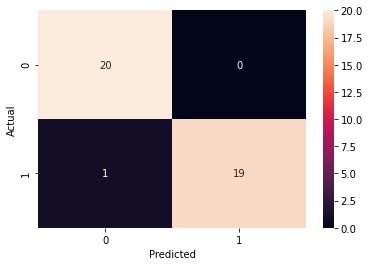

In [472]:
confusion = {'TP':0, 'TN':0, 'FP':0, 'FN':0}

for i in range(len(predicted)):
    if int(test[i,-1]) == 1 and predicted[i] == 1:
        confusion['TP']+=1
    elif int(test[i,-1]) == 1 and predicted[i] == 0:
        confusion['FN']+=1
    elif int(test[i,-1]) == 0 and predicted[i] == 1:
        confusion['FP']+=1
    else:
        confusion['TN']+=1
        
print(confusion)

ConfusionMatrix(testLabel, predicted)

In [473]:
p.predict([8,4,2,5])

0

In [474]:
# using sonar dataset
df = pd.read_csv('sonar.all-data.csv')

df['R'] = df['R'].map({'R': 1, 'M': 0})
df.head()

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  1  
1  0.0095  0.0078  1  
2  0.0040  0.0117  1  
3  0.0107  0.0094  1  
4  0.0051  0.0062  1  

[5 rows x 61 columns]

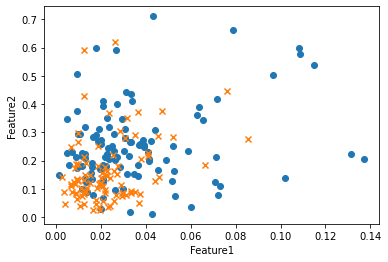

In [480]:
plt.scatter(df[ df['R']==0.0 ]['0.0200'], df[ df['R']==0.0 ]['0.2111'], marker='o', Label=0)
plt.scatter(df[ df['R']==1.0 ]['0.0200'], df[ df['R']==1.0 ]['0.2111'], marker='x', Label=1)

plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.show()

In [464]:
data = df.to_numpy()

test = np.vstack((data[:20], data[180:]))
train = data[20:180]

features = train[:,:-1]
labels = train[:,-1]

In [448]:
p = Perceptron(features.shape[1])
p.train(features, labels)

In [449]:
predicted = list()
testLabel = list(map(int, test[:,-1]))

print("Labels\tPredicted")

for i in range(test.shape[0]):
    predicted.append(p.predict(test[i,:-1]))
    print(f'{int(test[i,-1])}\t{predicted[-1]}')

Labels	Predicted
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	0
1	1
1	0
1	0
1	1
1	0
1	1
1	0
1	0
1	1
1	0
1	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	0
0	1
0	0
0	0


{'TP': 4, 'TN': 26, 'FP': 1, 'FN': 16}


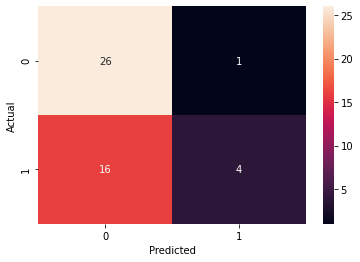

In [450]:
confusion = {'TP':0, 'TN':0, 'FP':0, 'FN':0}

for i in range(len(predicted)):
    if int(test[i,-1]) == 1 and predicted[i] == 1:
        confusion['TP']+=1
    elif int(test[i,-1]) == 1 and predicted[i] == 0:
        confusion['FN']+=1
    elif int(test[i,-1]) == 0 and predicted[i] == 1:
        confusion['FP']+=1
    else:
        confusion['TN']+=1
        
print(confusion)

ConfusionMatrix(testLabel, predicted)